**Imagine a ladder, the top of the ladder represents the best possible life for you. The bottom of the ladder represents the worst possible life for you. On which step of the ladder do you see yourself?**

The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data. The World Happiness Report reflects a worldwide demand for more attention to happiness and well-being as criteria for government policy. It reviews the state of happiness in the world today and shows how the science of happiness explains personal and national variations in happiness.
Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings. They are based on answers to the main life evaluation question. The Cantril ladder asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples over three years.

Source: https://worldhappiness.report/

In addition to the Ladder (happiness) scores, the following factors were measured and will be examined:
* GDP per capita
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception



This notebook is purely an exploratory data analysis, to understand the data and to begin to overview the findings. I will be exploring the data from the World Happiness Report 2023 and also bringing in region and subregion country data from a country mapping dataset to understand how geography plays a role in happiness.

# Importing the data and the libraries

In [267]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-mapping-iso-continent-region/continents2.csv
/kaggle/input/world-happiness-report-2023/WHR2023.csv


In [268]:
#Import the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [269]:
#Load WHR2023 dataset and create a dataframe called 'happy_2023'

happy_2023 = pd.read_csv("../input/world-happiness-report-2023/WHR2023.csv")

#Load country mapping dataset and create a dataframe called 'country_mapping' (we'll need this later to extract regional indicators)

country_mapping = pd.read_csv("../input/country-mapping-iso-continent-region/continents2.csv")

# 🗃️ Step 1: Understanding the data
* Dataframe shape
* Data types
* Dataframe descriptions
* Dataframe heads and tails

In [270]:
#How many rows (countries) and columns in the World Happiness 2023 dataset?
happy_2023.shape

(137, 19)

In [271]:
#How many rows (countries) and columns in the Country Mappings dataset?
country_mapping.shape

(249, 11)

In [272]:
#What are the column names in the World Happiness 2023 dataset?
happy_2023.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [273]:
#What are the column names in the Country Mappings dataset?
country_mapping.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [274]:
#And the data types of the World Happiness 2023 dataset columns?
happy_2023.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

In [275]:
#And the data types of the country mapping columns?
country_mapping.dtypes

name                         object
alpha-2                      object
alpha-3                      object
country-code                  int64
iso_3166-2                   object
region                       object
sub-region                   object
intermediate-region          object
region-code                 float64
sub-region-code             float64
intermediate-region-code    float64
dtype: object

In [276]:
# Lets describe the World Happiness Report data we are working with
happy_2023.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [277]:
#Grabbing the top five rows of the happiness dataframe
happy_2023.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [278]:
#Grabbing the top five rows of the country mapping dataframe
country_mapping.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


# 🧹 Step 2: Preparing the data
* Check for duplicates
* Dropping irrelevant columns and rows
* Creating new columns
* Renaming Columns
* Merging the dataframes
* Checking for and fixing nulls

In [279]:
# Lets take a look at the happiness report 2023 data again
happy_2023

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [280]:
#Here we check for duplicate rows
happy_2023.loc[happy_2023.duplicated()]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


In [281]:
# Remove all columns between column name 'Ladder score in Dystopia' to 'Dystopia + residual' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Ladder score in Dystopia':'Dystopia + residual'].columns, axis=1)
# Remove all columns between column name 'Standard error of ladder score' to 'lowerwhisker' 
happy_2023 = happy_2023.drop(happy_2023.loc[:, 'Standard error of ladder score':'lowerwhisker'].columns, axis=1)


In [282]:
#Create integer rank column 
happy_2023['rank'] = happy_2023['Ladder score'].rank(ascending=False)
happy_2023['rank'] = happy_2023['rank'].astype(int)

In [283]:
#Rename the columns for consistency
happy_df_2023 = happy_2023.rename({'Country name':'country','Standard error of ladder score':'standard_error_of_ladder_score'
                                   , 'Ladder score':'happiness_score','Happiness score':'happiness_score'
                                   , 'Logged GDP per capita':'gdp_per_capita','Social support':'social_support'
                                   , 'Healthy life expectancy':'healthy_life_expectancy'
                                   , 'Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'
                                   , 'Explained by: Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Explained by: Generosity':'generosity'
                                   , 'Explained by: Perceptions of corruption':'perceptions_of_corruption'}, axis =1)
happy_df_2023.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [284]:
#Create top 10 and bottom 10 identifier column

def top_bottom_identifier(value):
    if value < 11:
        return "top 10 happiest"
    if value > 127:
        return "bottom 10 happiest"
    elif 11 <= value < 128:
        return "not top/bottom 10"
    
 
happy_df_2023['top_bottom_identifier'] = happy_df_2023['rank'].map(top_bottom_identifier)


In [285]:
# Take a look at the country_mapping data
country_mapping.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [286]:
# Dropping irrelevant columns
country_mapping.drop('alpha-2', inplace=True, axis=1)
# Remove all columns between column name 'country-code' to 'iso_3166-2' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)
# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
country_mapping = country_mapping.drop(country_mapping.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)
country_mapping.head()

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [287]:
#Rename the columns for consistency
country_mapping = country_mapping.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)

In [288]:
#Merge the happiness data and country mapping dataframes
happy_region_df = happy_df_2023.merge(country_mapping, on='country', how='left')
happy_region_df


,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,top 10 happiest,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,top 10 happiest,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,top 10 happiest,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,top 10 happiest,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,top 10 happiest,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,NaN,NaN,NaN
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,bottom 10 happiest,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,bottom 10 happiest,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,bottom 10 happiest,LBN,Asia,Western Asia


In [289]:
#Check for nulls
happy_region_df.isnull().sum()

country                          0
happiness_score                  0
gdp_per_capita                   0
social_support                   0
healthy_life_expectancy          1
freedom_to_make_life_choices     0
generosity                       0
perceptions_of_corruption        0
rank                             0
top_bottom_identifier            0
iso_alpha                       11
region                          11
sub_region                      11
dtype: int64

In [290]:
# Indentifying the null 'healthy_life_expectancy' row
nan_hlf_rows = happy_region_df[happy_region_df['healthy_life_expectancy'].isnull()]
nan_hlf_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,not top/bottom 10,NaN,NaN,NaN


State of Palestine - null for healthy_life_expectancy - good to know, we shall leave it as null

In [291]:
# Check for rows with null region that did not match correctly when merging
nan_region_rows = happy_region_df[happy_region_df['region'].isnull()]
nan_region_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
17,Czechia,6.845,10.611,0.953,69.050,0.903,0.040,0.859,18,not top/bottom 10,NaN,NaN,NaN
26,Taiwan Province of China,6.535,10.797,0.884,69.600,0.804,-0.129,0.681,27,not top/bottom 10,NaN,NaN,NaN
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,not top/bottom 10,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,71,not top/bottom 10,NaN,NaN,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,77.280,0.687,-0.026,0.385,82,not top/bottom 10,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,86,not top/bottom 10,NaN,NaN,NaN
86,North Macedonia,5.254,9.703,0.805,66.500,0.769,0.131,0.902,87,not top/bottom 10,NaN,NaN,NaN
92,Ivory Coast,5.053,8.576,0.572,55.953,0.733,0.003,0.746,93,not top/bottom 10,NaN,NaN,NaN
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,not top/bottom 10,NaN,NaN,NaN
105,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,106,not top/bottom 10,NaN,NaN,NaN


In [292]:
#Lets change the names in the country_mapping df to match those of the happiness report where appropriate

#Turkey ----> Turkiye
country_mapping['country'] = country_mapping['country'].str.replace('Turkey', 'Turkiye', regex=True)
#Palestine, State of ----> State of Palestine
country_mapping['country'] = country_mapping['country'].str.replace('Palestine, State of', 'State of Palestine', regex=True)
#Côte D'Ivoire ----> Ivory Coast
country_mapping['country'] = country_mapping['country'].str.replace("Côte D'Ivoire", 'Ivory Coast', regex=True)
#Macedonia ----> North Macedonia
country_mapping['country'] = country_mapping['country'].str.replace('Macedonia', 'North Macedonia', regex=True)
#Hong Kong ----> Hong Kong S.A.R. of China
country_mapping['country'] = country_mapping['country'].str.replace('Hong Kong', 'Hong Kong S.A.R. of China', regex=True)
#Taiwan ----> Taiwan Province of China
country_mapping['country'] = country_mapping['country'].str.replace('Taiwan', 'Taiwan Province of China', regex=True)
#Czech Republic ----> Czechia
country_mapping['country'] = country_mapping['country'].str.replace('Czech Republic', 'Czechia', regex=True)

In [293]:
#Merge the dataframes again
happy_region_df = happy_df_2023.merge(country_mapping, on='country', how='left')

In [294]:
#Check for nulls
happy_region_df.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
top_bottom_identifier           0
iso_alpha                       4
region                          4
sub_region                      4
dtype: int64

In [295]:
#Lets fix the nulls in the last four rows manually
nan_region_rows = happy_region_df[happy_region_df['region'].isnull()]
nan_region_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,not top/bottom 10,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,71,not top/bottom 10,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,86,not top/bottom 10,NaN,NaN,NaN
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,NaN,NaN,NaN


In [296]:
#Manually updating region, sub_region and iso code for Kosovo
happy_region_df.loc[33,'region'] = 'Europe'
happy_region_df.loc[33,'sub_region'] = 'Southern Europe'
happy_region_df.loc[33,'iso_alpha'] = 'XXK'

#Manually updating region, sub_region and iso code for Bosnia and Herzegovina
happy_region_df.loc[70,'region'] = 'Europe'
happy_region_df.loc[70,'sub_region'] = 'Southern Europe'
happy_region_df.loc[70,'iso_alpha'] = 'BIH'

#Manually updating region, sub_region and iso code for Congo (Brazzaville)
happy_region_df.loc[85,'region'] = 'Africa'
happy_region_df.loc[85,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[85,'iso_alpha'] = 'COG'

#Manually updating region, sub_region and iso code for Congo (Kinshasa)
happy_region_df.loc[132,'region'] = 'Africa'
happy_region_df.loc[132,'sub_region'] = 'Sub-Saharan Africa'
happy_region_df.loc[132,'iso_alpha'] = 'COD'

In [297]:
#Run a query to check Kosoco nulls are fixed
happy_region_df.query('country == "Kosovo"')

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,not top/bottom 10,XXK,Europe,Southern Europe


In [298]:
# Lets view our cleaned and merged data_frame
happy_region_df

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,top 10 happiest,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,top 10 happiest,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,top 10 happiest,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,top 10 happiest,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,top 10 happiest,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,COD,Africa,Sub-Saharan Africa
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,bottom 10 happiest,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,bottom 10 happiest,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,bottom 10 happiest,LBN,Asia,Western Asia


In [299]:
happy_region_df.tail(10)

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,top_bottom_identifier,iso_alpha,region,sub_region
127,Zambia,3.982,8.074,0.694,55.032,0.791,0.098,0.818,128,bottom 10 happiest,ZMB,Africa,Sub-Saharan Africa
128,Tanzania,3.694,7.857,0.653,59.401,0.838,0.182,0.554,129,bottom 10 happiest,TZA,Africa,Sub-Saharan Africa
129,Comoros,3.545,8.075,0.471,59.425,0.470,-0.014,0.727,130,bottom 10 happiest,COM,Africa,Sub-Saharan Africa
130,Malawi,3.495,7.302,0.531,58.475,0.750,0.005,0.749,131,bottom 10 happiest,MWI,Africa,Sub-Saharan Africa
131,Botswana,3.435,9.629,0.753,54.725,0.742,-0.215,0.830,132,bottom 10 happiest,BWA,Africa,Sub-Saharan Africa
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,bottom 10 happiest,COD,Africa,Sub-Saharan Africa
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,bottom 10 happiest,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,bottom 10 happiest,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,bottom 10 happiest,LBN,Asia,Western Asia
136,Afghanistan,1.859,7.324,0.341,54.712,0.382,-0.081,0.847,137,bottom 10 happiest,AFG,Asia,Southern Asia


In [300]:
#Checking the region, sub_region and iso nulls have been fixed
happy_region_df.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
top_bottom_identifier           0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [301]:
# How many rows and columns in the new merged dataframe?
print(happy_region_df.shape)

(137, 13)


# 🔎 Step 3: Feature Understanding
(Univariate analysis and plotting feature distributions)
* Top and bottom happiest countries
* Happiest score density and distribution
* Factor densities
* Happiness score boxplots by region and sub_regions
* Sunburst plot (Region - Sub_regions - country) mean happiness scores
* Worldmap global visualisation


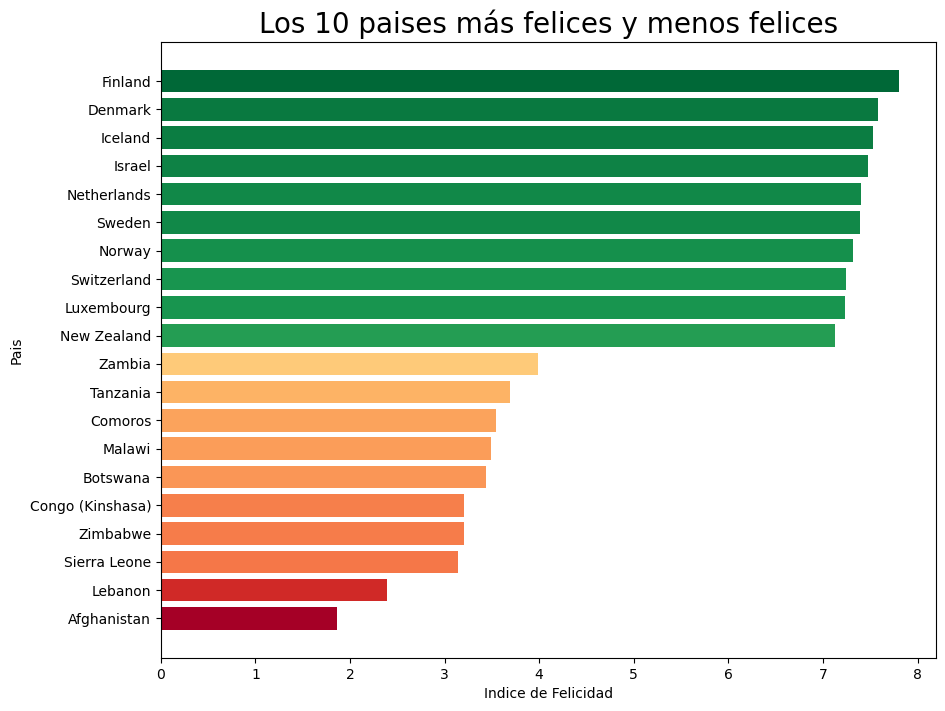

In [302]:
#Creating top 10 and bottom 10 data frames and concatinating them
top10 = happy_region_df.set_index('country')['happiness_score'].nlargest(10).to_frame()
bottom10 = happy_region_df.set_index('country')['happiness_score'].nsmallest(10).to_frame()
dfconcat = pd.concat([top10, bottom10], axis=0)
dfconcat = dfconcat.sort_values(by="happiness_score")

fig = plt.figure(figsize=(10,8))
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=dfconcat['happiness_score'].min(), vmax=dfconcat['happiness_score'].max())
colors = [cmap(norm(value)) for value in dfconcat['happiness_score']]

g = plt.barh(y=dfconcat.index, width=dfconcat["happiness_score"], color=colors)
plt.ylabel("Pais")
plt.xlabel("Indice de Felicidad")
plt.title("Los 10 paises más felices y menos felices", fontsize = 20)

plt.show()

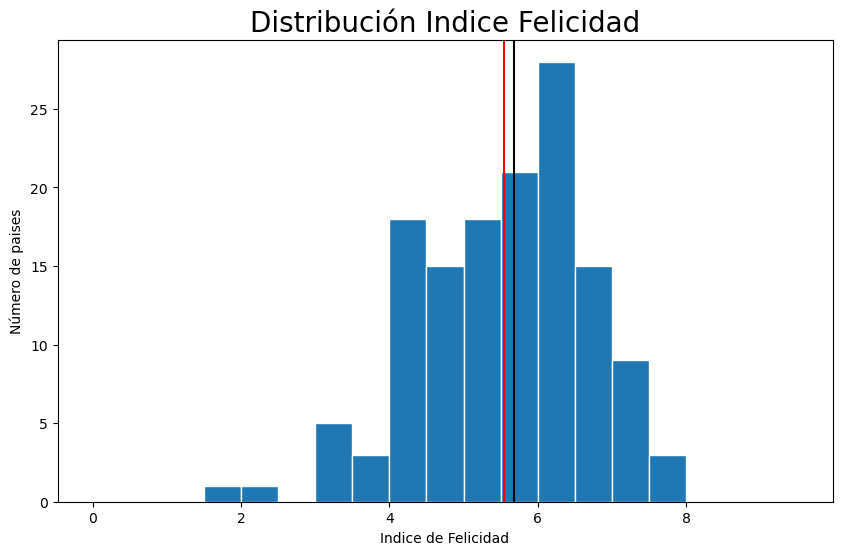

In [303]:
# Look at the distribution of happiness scores, plotting mean (red) and median (black) lines

plt.figure(figsize=(10,6))
plt.title("Distribución Indice Felicidad", fontsize = 20)
plt.xlabel('Indice de Felicidad')
plt.ylabel('Número de paises')
plt.hist(happy_region_df.happiness_score, bins = np.arange(0,10,0.5), edgecolor = 'white')

plt.axvline(x = happy_region_df['happiness_score'].mean(), color = 'red')
plt.axvline(x = happy_region_df['happiness_score'].median(), color = 'black')

In [304]:
happy_region_dfES.columns

Index(['pais', 'Indice_Felicidad', 'PIB_per_capita', 'Soporte_Social',
       'Esperanza_de_Vida', 'Libertad_tomar_decisiones_vitales', 'Generosidad',
       'Percepción_de_corrupcion', 'rank', 'top_bottom_identifier',
       'iso_alpha', 'region', 'sub_region'],
      dtype='object')

In [305]:
diccionario = {
    'country':'pais',
    'happiness_score':'Indice_Felicidad',
    'gdp_per_capita':'PIB_per_capita',
    'social_support':'Soporte_Social',
    'healthy_life_expectancy':'Esperanza_de_Vida',
    'freedom_to_make_life_choices':'Libertad_tomar_decisiones_vitales',
    'generosity':'Generosidad',
    'perceptions_of_corruption':'Percepción_de_corrupcion',
    'rank':'rank',
    'top_bottom_identifier':'top_bottom_identifier',
    'iso_alpha':'iso_alpha',
    'region':'region',
    'sub_region':'sub_region'
    
}

In [306]:
happy_region_dfES=happy_region_df.rename(columns=diccionario)

# Renombrar columnas
#df.rename(columns={'A': 'Columna1', 'B': 'Columna2', 'C': 'Columna3'}, inplace=True)

happy_region_dfES.head(2)


,pais,Indice_Felicidad,PIB_per_capita,Soporte_Social,Esperanza_de_Vida,Libertad_tomar_decisiones_vitales,Generosidad,Percepción_de_corrupcion,rank,top_bottom_identifier,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,1,top 10 happiest,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196,2,top 10 happiest,DNK,Europe,Northern Europe


We can observe the mean (red line) and median (black line) values are similar, indicating the happiness score has quite a symmetrical distribution with a slight left skew.
The spread is significant and a couple of very low happiness scores are present, isolated somewhat at the low happines score scale. From above, we know these to be the scores of Afghanistan and Lebanon.

<Figure size 640x480 with 0 Axes>

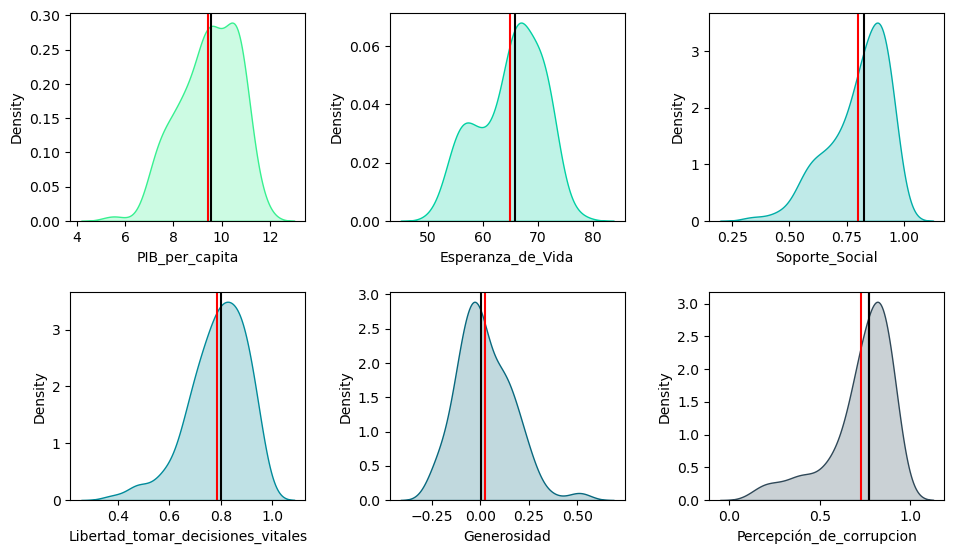

In [307]:
#Let's create kernel density estimates for the 6 factors

fig = plt. figure()
fig, axes = plt.subplots(2, 3, figsize= (10, 6))
plt.tight_layout(pad= 3)


plta = sns.kdeplot( data=happy_region_dfES, x='PIB_per_capita',color='#37F090',fill=True, ax=axes[0,0])
pltb = sns.kdeplot( data=happy_region_dfES, x='Esperanza_de_Vida',color='#00D0A3',fill=True, ax=axes[0,1])
pltc = sns.kdeplot( data=happy_region_dfES, x='Soporte_Social',color='#00ADA7',fill=True, ax=axes[0,2])
pltd = sns.kdeplot( data=happy_region_dfES, x='Libertad_tomar_decisiones_vitales',color='#008A9A',fill=True, ax=axes[1,0])
plte = sns.kdeplot( data=happy_region_dfES, x='Generosidad',color='#08687E',fill=True, ax=axes[1,1])
pltf = sns.kdeplot( data=happy_region_dfES, x='Percepción_de_corrupcion',color='#2F4858',fill=True, ax=axes[1,2])


plta.axvline(x = happy_region_dfES['PIB_per_capita'].mean(), color = 'red')
plta.axvline(x = happy_region_dfES['PIB_per_capita'].median(), color = 'black')
pltb.axvline(x = happy_region_dfES['Esperanza_de_Vida'].mean(), color = 'red')
pltb.axvline(x = happy_region_dfES['Esperanza_de_Vida'].median(), color = 'black')
pltc.axvline(x = happy_region_dfES['Soporte_Social'].mean(), color = 'red')
pltc.axvline(x = happy_region_dfES['Soporte_Social'].median(), color = 'black')
pltd.axvline(x = happy_region_dfES['Libertad_tomar_decisiones_vitales'].mean(), color = 'red')
pltd.axvline(x = happy_region_dfES['Libertad_tomar_decisiones_vitales'].median(), color = 'black')
plte.axvline(x = happy_region_dfES['Generosidad'].mean(), color = 'red')
plte.axvline(x = happy_region_dfES['Generosidad'].median(), color = 'black')
pltf.axvline(x = happy_region_dfES['Percepción_de_corrupcion'].mean(), color = 'red')
pltf.axvline(x = happy_region_dfES['Percepción_de_corrupcion'].median(), color = 'black')
pltf.axvline(x = happy_region_dfES['Percepción_de_corrupcion'].median(), color = 'black')




We can see how the six factors are distributed in the above plots. It is evident that factors are more normally and symetrically distributed than others, with some having strong left and right skews.

In [308]:
# lets grab the mean happiness score by each region

mean_happiness = happy_region_df.groupby('region')[['happiness_score']].mean()
mean_happiness = mean_happiness.sort_values(by=['happiness_score'], ascending=False)
mean_happiness

,happiness_score
region,
Oceania,7.109000
Europe,6.476462
Americas,6.057619
Asia,5.300553
Africa,4.419486


[Text(0.5, 0, 'Indice_Felicidad'), Text(0, 0.5, 'Region')]

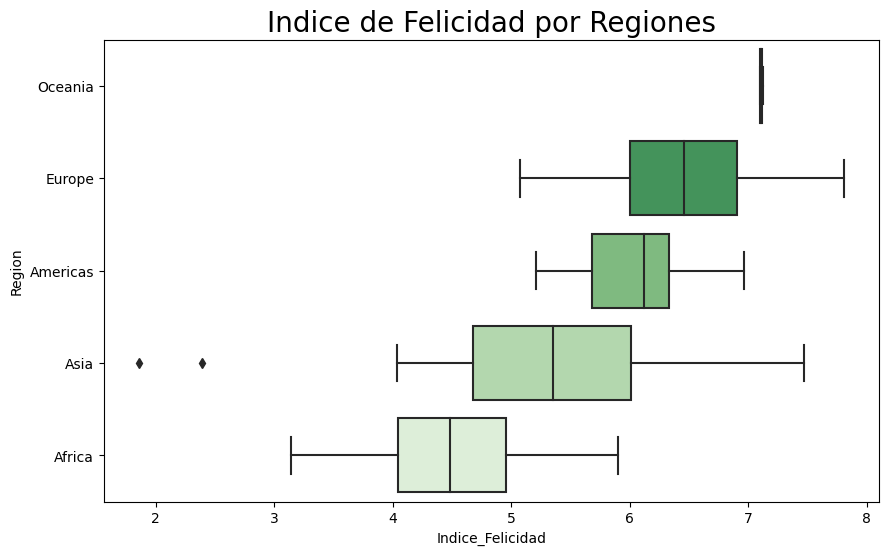

In [309]:
#lets see what this looks like on a boxplot graph, ordering by region mean

fig, ax = plt.subplots(figsize=(10,6))
plt.title("Indice de Felicidad por Regiones", fontsize = 20)
sns.boxplot(y="region", x="Indice_Felicidad", data=happy_region_dfES, orient="h", ax=ax, palette='Greens_r', order=["Oceania", "Europe", "Americas", "Asia", "Africa"] ).set(
    xlabel='Indice_Felicidad', 
    ylabel='Region'
)

In [310]:
# lets grab the mean happiness scores by each sub_region

mean_happiness = happy_region_df.groupby('sub_region')[['happiness_score']].mean()
mean_happiness = mean_happiness.sort_values(by=['happiness_score'], ascending=False)
mean_happiness

,happiness_score
sub_region,
Australia and New Zealand,7.109000
Northern Europe,7.076800
Western Europe,7.054286
Northern America,6.927500
Eastern Europe,6.024556
Southern Europe,6.016385
Latin America and the Caribbean,5.966053
Eastern Asia,5.930167
Central Asia,5.828250


[Text(0.5, 0, 'Indice_Felicidad'), Text(0, 0.5, 'Sub-Zonas')]

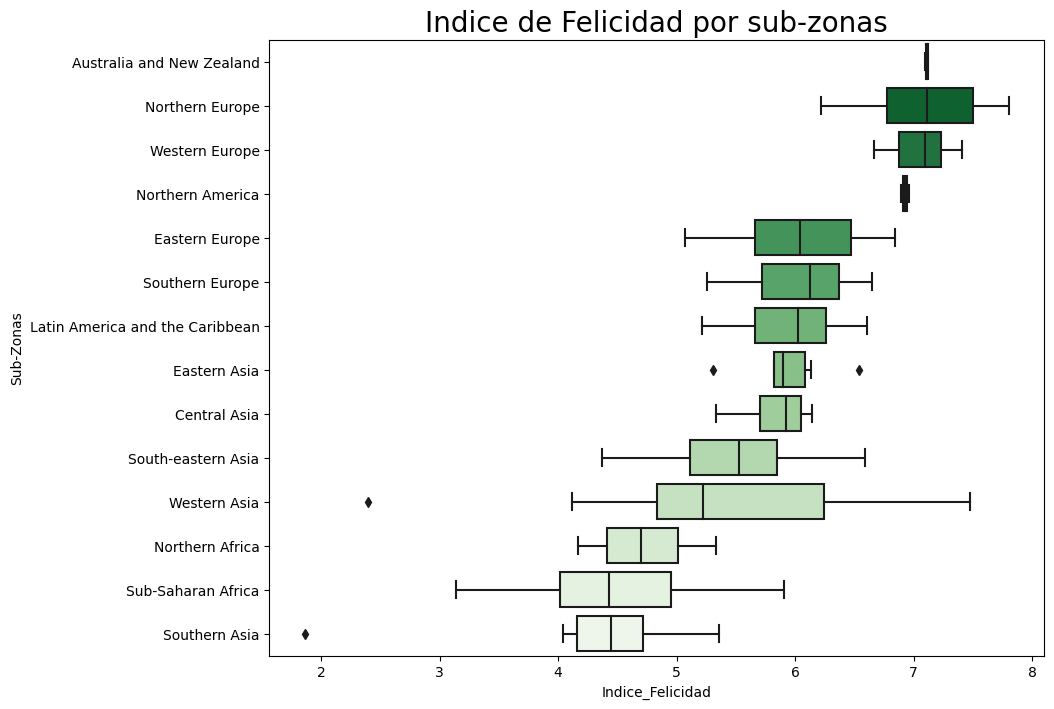

In [311]:
#lets see what this looks like on a boxplot graph, ordering my sub_region mean

fig, ax = plt.subplots(figsize=(10,8))
plt.title("Indice de Felicidad por sub-zonas", fontsize = 20)
sns.boxplot(y="sub_region", x="Indice_Felicidad", data=happy_region_dfES, orient="h", ax=ax, palette='Greens_r'
            , order=["Australia and New Zealand", "Northern Europe", "Western Europe", "Northern America", "Eastern Europe"
                     ,"Southern Europe","Latin America and the Caribbean","Eastern Asia","Central Asia","South-eastern Asia"
                     ,"Western Asia","Northern Africa","Sub-Saharan Africa","Southern Asia"]).set(
    xlabel='Indice_Felicidad', 
    ylabel='Sub-Zonas'
)

In [350]:
#Sunburst plot looking at the make up of the regions and sub_regions and how the happiness score of each country and sun_region compares with others in the same category

fig = px.sunburst(data_frame=happy_region_dfES,
                  path=["region", "sub_region", "pais"],
                  values="Indice_Felicidad",
                  color="Indice_Felicidad",
                  color_continuous_scale='RdYlGn',
                  width=1000, 
                  height=1000,
                  title = 'Diagrama radial del indice de felicidad - región / subregión / país')
fig.show()

In [355]:
import plotly.express as px
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'happy_region_dfES' con las columnas necesarias
# ...

# Crear el gráfico sunburst
fig = px.sunburst(data_frame=happy_region_dfES,
                  path=["region", "sub_region", "pais"],
                  values="Indice_Felicidad",
                  color="Indice_Felicidad",
                  color_continuous_scale='RdYlGn',
                  width=1000, 
                  height=1000,
                  title='Diagrama radial del índice de felicidad - región / subregión / país')

# Convertir el gráfico a HTML
fig_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# Encerrar el gráfico en un div para centrarlo
fig_html_centered = f"<div style='text-align: center;'>{fig_html}</div>"

# Añadir título y pie de página al HTML
html_title = "<h1 style='text-align: center;'>Indice de Felicidad por Áreas</h1>"
html_footer = "<footer style='text-align: center;'><p>Basado en:<a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023'>World Happiness Report</a>.</p></footer>"

# Combinar todo en un solo HTML
final_html = f"<!DOCTYPE html><html><head>{html_title}</head><body>{fig_html_centered}{html_footer}</body></html>"

# Guardar en archivo HTML
with open('sunburst_happiness_analysis.html', 'w') as f:
    f.write(final_html)

This sunburst plot is great to visualise the happiness scores in each region and sub_region. Its particularly interesting to see the spread of country happiness scores in each sub_region.

In [313]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(happy_region_dfES, locations = "iso_alpha", 
              color = "rank", scope = 'world', title = "Mapa de distribución de indices de Felicidad", 
              color_continuous_scale= "rdylgn_r", hover_name="pais")

happy_world_map.show()

We can clearly see where the happy and unhappy countries are on the world map above.

In [314]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(happy_region_dfES, locations = "iso_alpha", 
              color = "rank", scope = 'europe', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="pais")

happy_world_map.show()

In [315]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "rank", scope = 'africa', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="country")

happy_world_map.show()

In [316]:
#Visualise happiness score rankings on a global scale

happy_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "rank", scope = 'asia', title = "Happiness Ranking World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="country")

happy_world_map.show()

In [317]:
#Visualise GDP per capita on a global scale

gdp_world_map = px.choropleth(happy_region_dfES, locations = "iso_alpha", 
              color = "PIB_per_capita", scope = 'world', title = "PIB_per_capita", 
              color_continuous_scale= "rdylgn", hover_name="pais")

gdp_world_map.show()

In [318]:
#Visualise healthy life expectancy on a global scale

life_expectancy_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "healthy_life_expectancy", scope = 'world', title = "Healthy Life Expectancy World Map", 
              color_continuous_scale= "rdylgn", hover_name="country")

life_expectancy_world_map.show()

In [319]:
#Visualise social support scores on a global scale

social_support_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "social_support", scope = 'world', title = "Social Support World Map", 
              color_continuous_scale= "rdylgn", hover_name="country")

social_support_world_map.show()

In [320]:
#Visualise freedom scores on a global scale

freedom_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "freedom_to_make_life_choices", scope = 'world', title = "Freedom World Map", 
              color_continuous_scale= "rdylgn", hover_name="country")

freedom_world_map.show()

In [321]:
#Visualise Generosity scores on a global scale

generosity_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "generosity", scope = 'world', title = "Generosity World Map", 
              color_continuous_scale= "rdylgn", hover_name="country")

generosity_world_map.show()

In [322]:
#Visualise Perception of corruption scores on a global scale

corruption_world_map = px.choropleth(happy_region_df, locations = "iso_alpha", 
              color = "perceptions_of_corruption", scope = 'world', title = "Perceptions of Corruption World Map", 
              color_continuous_scale= "rdylgn_r", hover_name="country")

corruption_world_map.show()

# 📈 Step 4: Feature Relationships
* Pairplot
* Correlations and Heatmap
* Factor scatterplots

<Figure size 500x1000 with 0 Axes>

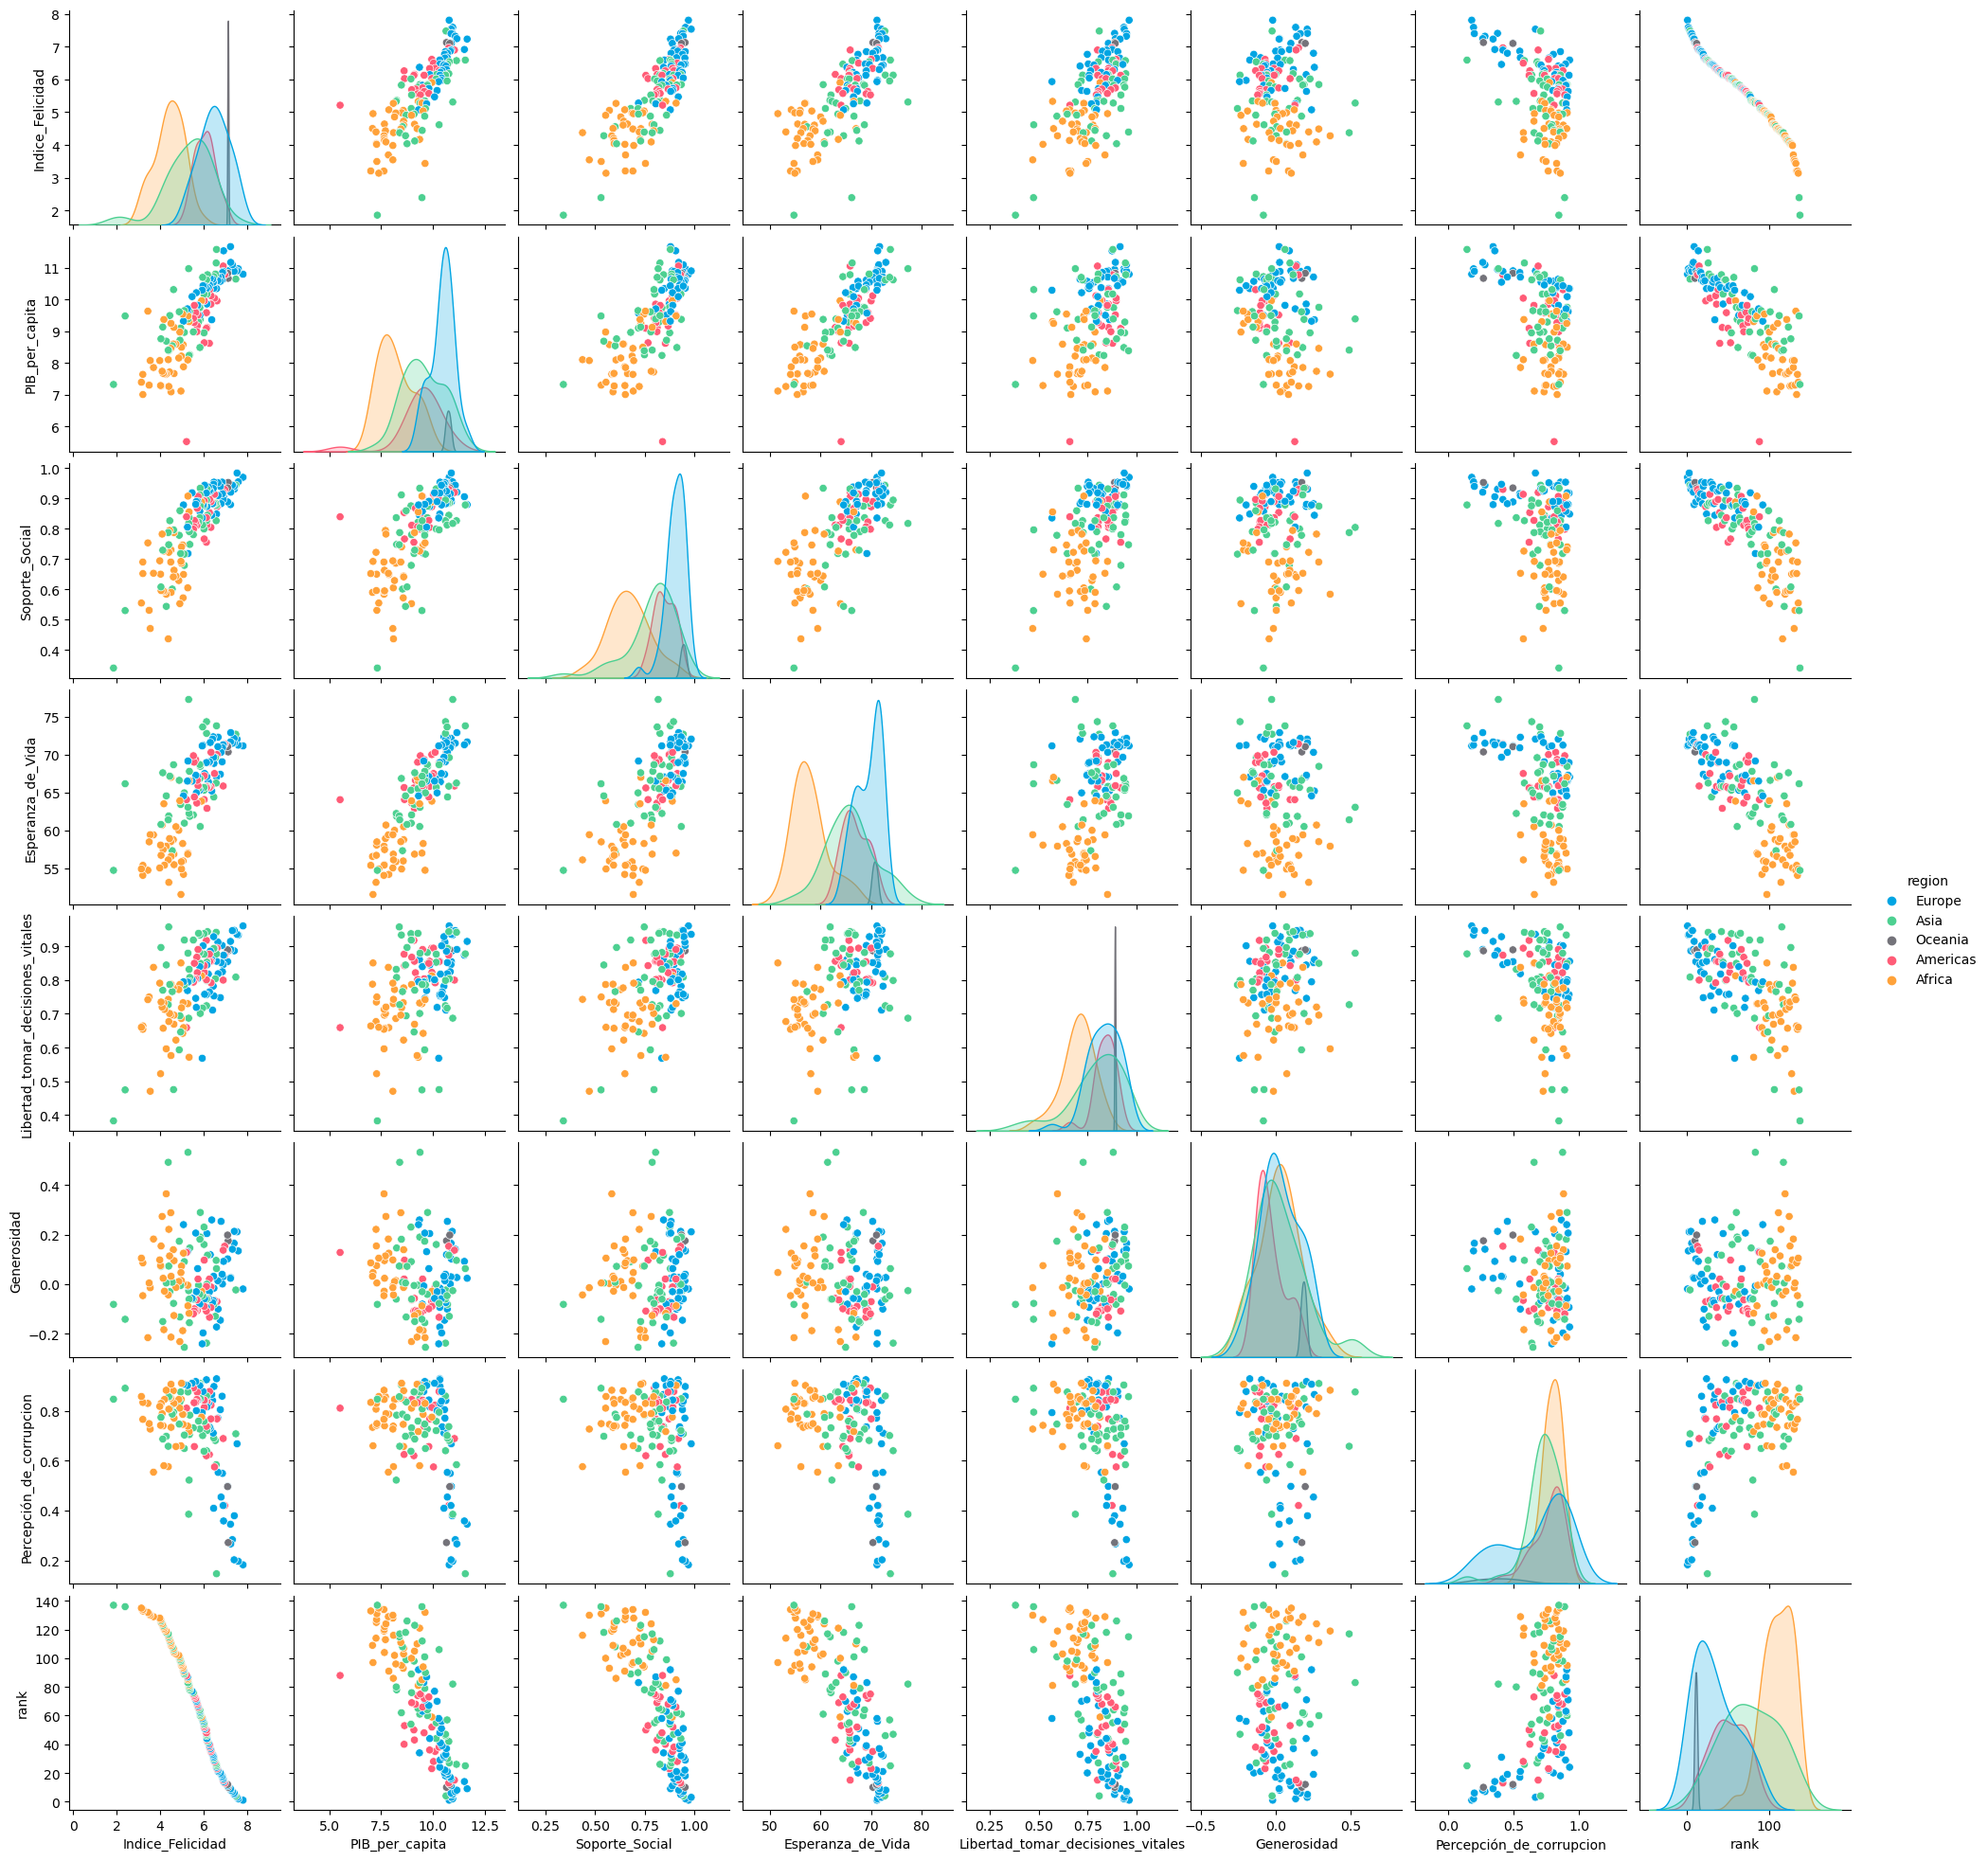

In [343]:
#Lets visualise this dataframe
palette ={"Europe": "#00A5E3", "Asia": "#4DD091", "Oceania": "#74737A", "Americas": "#FF5C77", "Africa": "#FFA23A"}
plt.figure(figsize = (5,10))
angel = sns.pairplot(happy_region_dfES, hue = 'region', palette = palette)

# Convertir la figura a HTML e incrustarla en un archivo
html_str2 = mpld3.fig_to_html(angel.fig)

# Encerrar los gráficos en un div para centrarlos
html_graphs = f"<div style='text-align: center;'>{html_str2}</div>"

# Añadir título y pie de página al HTML
html_title = "<h1 style='text-align: center;'>PRESENTACION</h1>"
html_footer = "<footer style='text-align: center;'><p>Datos: <a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023'>World Happiness Report 2023</a>.</p></footer>"
final_html = html_title + html_graphs + html_footer

with open('happiness_plots01.html', 'w') as f:
    f.write(final_html)

# Cerrar la figura de matplotlib
plt.close(fig)

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mpld3

# Reemplaza con tu DataFrame 'happy_region_dfES'
# ...

# Definir la paleta de colores
palette = {"Europe": "#00A5E3", "Asia": "#4DD091", "Oceania": "#74737A", "Americas": "#FF5C77", "Africa": "#FFA23A"}

# Crear los gráficos individualmente y almacenar el HTML de cada uno en una lista
variables = list(happy_region_dfES.columns)

# Lista de columnas a eliminar
columns_to_remove = ['rank', 'top_bottom_identifier', 'iso_alpha', 'region', 'sub_region']

# Crear la lista de variables excluyendo las columnas no deseadas
variables = [col for col in happy_region_dfES.columns if col not in columns_to_remove]

graphs_html = []

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            plt.figure(figsize=(5, 4))
            sns.scatterplot(x=happy_region_dfES[variables[i]], y=happy_region_dfES[variables[j]], hue=happy_region_dfES['region'], palette=palette)
            plt.title(f"{variables[i]} vs {variables[j]}")
            graph_html = mpld3.fig_to_html(plt.gcf())
            graphs_html.append(f"<div style='float: left; width: 33%;'>{graph_html}</div>")
            plt.close()

# Añadir título y pie de página al HTML
html_title = "<h1 style='text-align: center;'>Análisis Detallado por Región</h1>"
html_footer = "<footer style='text-align: center;'><p>© 2023 Análisis de Datos. Datos obtenidos de <a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023'>Kaggle</a>.</p></footer>"

# Unir todos los gráficos HTML en un contenedor
graphs_container = f"<div style='display: flex; flex-wrap: wrap;'>{''.join(graphs_html)}</div>"

final_html = html_title + graphs_container + html_footer

# Guardar en archivo HTML
with open('detailed_happiness_plots.html', 'w') as f:
    f.write(final_html)

In [346]:
happy_region_dfES.columns

Index(['pais', 'Indice_Felicidad', 'PIB_per_capita', 'Soporte_Social',
       'Esperanza_de_Vida', 'Libertad_tomar_decisiones_vitales', 'Generosidad',
       'Percepción_de_corrupcion', 'rank', 'top_bottom_identifier',
       'iso_alpha', 'region', 'sub_region'],
      dtype='object')

In [324]:
# Look at the correlation (default pearson method)
correlation_df = happy_region_dfES.corr()
correlation_df

,Indice_Felicidad,PIB_per_capita,Soporte_Social,Esperanza_de_Vida,Libertad_tomar_decisiones_vitales,Generosidad,Percepción_de_corrupcion,rank
Indice_Felicidad,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911,-0.975804
PIB_per_capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961,-0.812423
Soporte_Social,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490,-0.813902
Esperanza_de_Vida,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,-0.763448
Libertad_tomar_decisiones_vitales,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786,-0.625017
Generosidad,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653,-0.018752
Percepción_de_corrupcion,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000,0.482917
rank,-0.975804,-0.812423,-0.813902,-0.763448,-0.625017,-0.018752,0.482917,1.000000


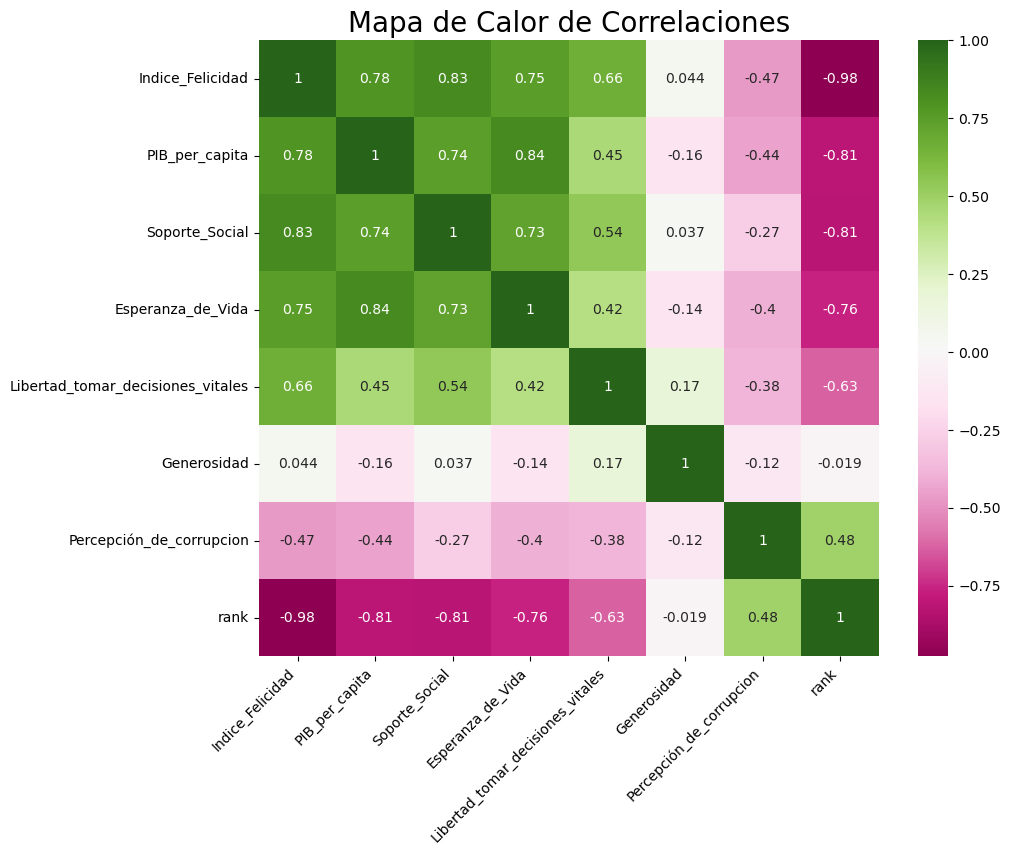

In [325]:
# Plot the clipped correlation on a heatmap with annotations to check which variables have the strongest correlation with happiness score (gdp_per_capita / social_support / healthy_life_expectancy)

plt.figure(figsize=(10,8))
plt.title("Mapa de Calor de Correlaciones", fontsize = 20)
sns.heatmap(correlation_df ,annot=True, cmap="PiYG")
plt.xticks(rotation = 45, ha = 'right');

<AxesSubplot:xlabel='social_support', ylabel='healthy_life_expectancy'>

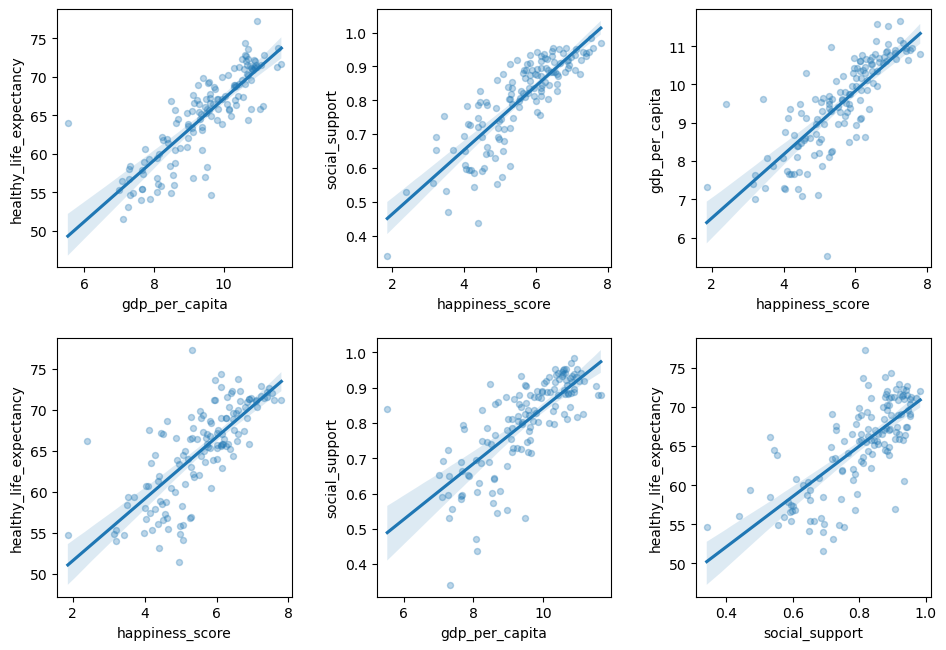

In [326]:
#Let's visualise some of the strongest correlations

fig, axes = plt.subplots(2, 3, figsize= (10, 7))
plt.tight_layout(pad= 3)

sns.regplot(x = happy_region_df.gdp_per_capita, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75},ax=axes[0,0])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.social_support, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[0,1])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.gdp_per_capita, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[0,2])
sns.regplot(x = happy_region_df.happiness_score, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,0])
sns.regplot(x = happy_region_df.gdp_per_capita, y = happy_region_df.social_support, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,1])
sns.regplot(x = happy_region_df.social_support, y = happy_region_df.healthy_life_expectancy, marker=".", scatter_kws={"alpha":0.3,"s":75}, ax=axes[1,2])


In [327]:
happy_region_dfES.columns

Index(['pais', 'Indice_Felicidad', 'PIB_per_capita', 'Soporte_Social',
       'Esperanza_de_Vida', 'Libertad_tomar_decisiones_vitales', 'Generosidad',
       'Percepción_de_corrupcion', 'rank', 'top_bottom_identifier',
       'iso_alpha', 'region', 'sub_region'],
      dtype='object')

In [340]:
#Let's plot happiness score against the '6 factors' and colour by region

fig, axes = plt.subplots(2, 3, figsize= (11, 7))
plt.tight_layout(pad= 3)

palette ={"Europe": "#00A5E3", "Asia": "#4DD091", "Oceania": "#74737A", "Americas": "#FF5C77", "Africa": "#FFA23A"}

plot_a = sns.scatterplot(x = happy_region_dfES.PIB_per_capita, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,0], hue = happy_region_dfES.region, palette = palette, s = 50, legend=False)
plot_b = sns.scatterplot(x = happy_region_dfES.Soporte_Social, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,1], hue = happy_region_dfES.region, palette = palette, s = 50, legend=False)
plot_c = sns.scatterplot(x = happy_region_dfES.Esperanza_de_Vida, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,2], hue = happy_region_dfES.region, palette = palette, s = 50)
plot_d = sns.scatterplot(x = happy_region_dfES.Libertad_tomar_decisiones_vitales, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,0], hue = happy_region_df.region, palette = palette, s = 50, legend=False)
plot_e = sns.scatterplot(x = happy_region_dfES.Generosidad, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,1], hue = happy_region_dfES.region, palette = palette, s = 50, legend=False)
plot_f = sns.scatterplot(x = happy_region_dfES.Percepción_de_corrupcion, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,2], hue = happy_region_df.region, palette = palette, s = 50, legend=False)


plot_c.legend(loc='center left', fontsize = '10', bbox_to_anchor=(1, 0), ncol=1)

# Convertir la figura a HTML e incrustarla en un archivo
html_str1 = mpld3.fig_to_html(fig)

# Encerrar los gráficos en un div para centrarlos
html_graphs = f"<div style='text-align: center;'>{html_str1}</div>"

# Añadir título y pie de página al HTML
html_title = "<h1 style='text-align: center;'>PRESENTACION</h1>"
html_footer = "<footer style='text-align: center;'><p>Datos: <a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023'>World Happiness Report 2023</a>.</p></footer>"
final_html = html_title + html_graphs + html_footer

with open('happiness_plots00.html', 'w') as f:
    f.write(final_html)

# Cerrar la figura de matplotlib
plt.close(fig)
        

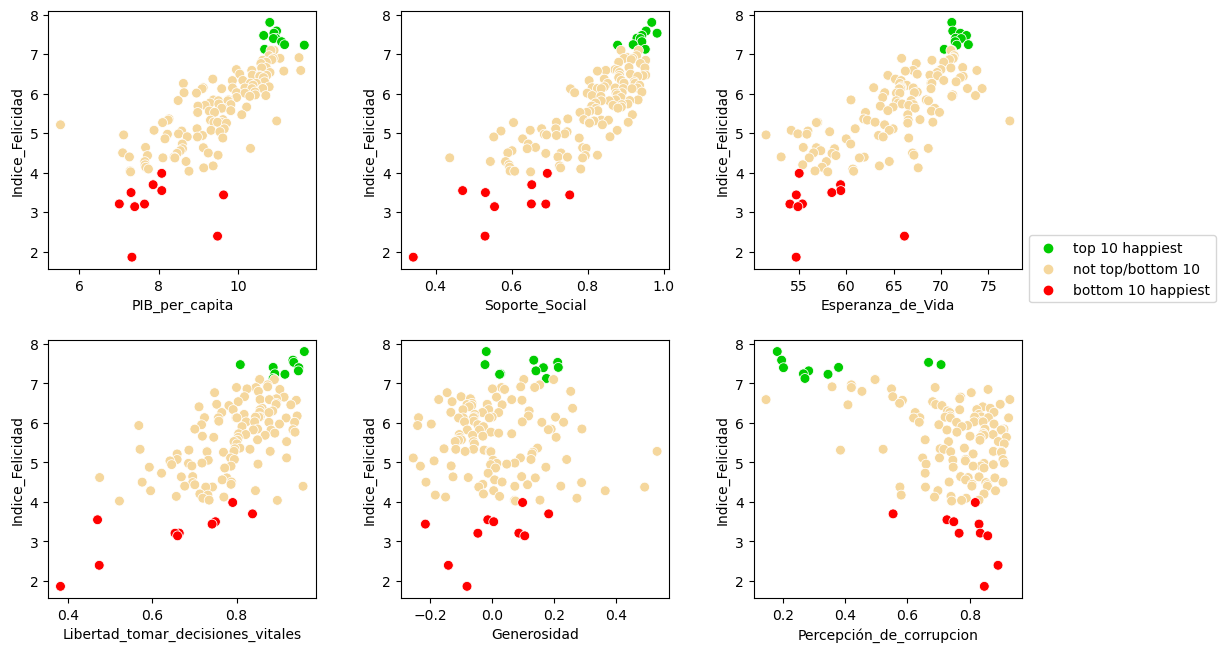

In [329]:
#Let's plot happiness score against the '6 factors' and highlight the top 10 and bottom 10 happiest countries

fig, axes = plt.subplots(2, 3, figsize= (11, 7))
plt.tight_layout(pad= 3)

palette2 ={"top 10 happiest": "#00CC00", "bottom 10 happiest": "#FF0000", "not top/bottom 10": "#f5d79d"}

plot_a = sns.scatterplot(x = happy_region_dfES.PIB_per_capita, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,0], hue = happy_region_dfES.top_bottom_identifier, palette = palette2, s = 50, legend=False)
plot_b = sns.scatterplot(x = happy_region_dfES.Soporte_Social, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,1], hue = happy_region_dfES.top_bottom_identifier, palette = palette2, s = 50, legend=False)
plot_c = sns.scatterplot(x = happy_region_dfES.Esperanza_de_Vida, y = happy_region_dfES.Indice_Felicidad, ax=axes[0,2], hue = happy_region_dfES.top_bottom_identifier, palette = palette2, s = 50)
plot_d = sns.scatterplot(x = happy_region_dfES.Libertad_tomar_decisiones_vitales, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,0], hue = happy_region_df.top_bottom_identifier, palette = palette2, s = 50, legend=False)
plot_e = sns.scatterplot(x = happy_region_dfES.Generosidad, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,1], hue = happy_region_dfES.top_bottom_identifier, palette = palette2, s = 50, legend=False)
plot_f = sns.scatterplot(x = happy_region_dfES.Percepción_de_corrupcion, y = happy_region_dfES.Indice_Felicidad, ax=axes[1,2], hue = happy_region_df.top_bottom_identifier, palette = palette2, s = 50, legend=False)


plot_c.legend(loc='center left', fontsize = '10', bbox_to_anchor=(1, 0), ncol=1)

In [330]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [331]:
import mpld3

In [332]:
# Ajustar la leyenda en el último gráfico
axes[0, 2].legend(loc='center', bbox_to_anchor=(1, 0.5), fontsize=10)

# Convertir la figura a HTML e incrustarla en un archivo
html_str = mpld3.fig_to_html(fig)
with open('happiness_plots.html', 'w') as f:
    f.write(html_str)

# Cerrar la figura de matplotlib
plt.close(fig)

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mpld3

# Suponiendo que tienes un DataFrame llamado 'happy_region_dfES' con las columnas necesarias
# y una columna 'top_bottom_identifier' que indica si el país está entre los 10 más felices, 
# los 10 menos felices o ninguno de los dos

# Configuración de la paleta de colores
palette2 = {"top 10 happiest": "#00CC00", "bottom 10 happiest": "#FF0000", "not top/bottom 10": "#f5d79d"}

# Crear la figura y los ejes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.tight_layout(pad=3, h_pad=4, w_pad=2)

# Añadir un título global a la figura
fig.suptitle('PRESENTACION', fontsize=16, fontweight='bold')

# Desplazar los gráficos hacia abajo para acomodar el título global
plt.subplots_adjust(top=0.88)

# Crear los gráficos de dispersión
scatter_plots = []
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['PIB_per_capita'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[0, 0], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['Soporte_Social'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[0, 1], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['Esperanza_de_Vida'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[0, 2], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['Libertad_tomar_decisiones_vitales'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[1, 0], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['Generosidad'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[1, 1], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))
scatter_plots.append(sns.scatterplot(x=happy_region_dfES['Percepción_de_corrupcion'], y=happy_region_dfES['Indice_Felicidad'], ax=axes[1, 2], hue=happy_region_dfES['top_bottom_identifier'], palette=palette2, s=50, legend=False))

# Añadir etiquetas a los ejes y títulos a los gráficos según sea necesario
for ax, title in zip(axes.flatten(), ['PIB per Capita', 'Soporte Social', 'Esperanza de Vida', 'Libertad para tomar decisiones vitales', 'Generosidad', 'Percepción de corrupción']):
    ax.set_title(title)
    ax.set_xlabel('Valor del Factor')
    ax.set_ylabel('Índice de Felicidad')

# Añadir texto 'GRAFICA01'
fig.text(0.5, 0.06, 'GRAFICA01', ha='center', va='center', fontsize=12)

# Añadir texto de la fuente
fig.text(0.5, 0.02, 'Fuente: WEB', ha='center', va='center', fontsize=10)

# Ajustar el layout para acomodar los textos y asegurarse de que los ejes sean visibles
plt.subplots_adjust(bottom=0.2)

# Convertir la figura a HTML e incrustarla en un archivo
html_str = mpld3.fig_to_html(fig)

# Encerrar los gráficos en un div para centrarlos
html_graphs = f"<div style='text-align: center;'>{html_str}</div>"

# Añadir título y pie de página al HTML
html_title = "<h1 style='text-align: center;'>PRESENTACION</h1>"
html_footer = "<footer style='text-align: center;'><p>Fuente: World Happiness Report 2023</p></footer>"
final_html = html_title + html_graphs + html_footer

with open('happiness_plots3.html', 'w') as f:
    f.write(final_html)

# Cerrar la figura de matplotlib
plt.close(fig)

# 💎 Step 5: Findings


**Explained by Factors**


Looking at the Word Happiness Report 2023 data, we can see how certain factors appear to contribute towards the happiness score of a country. We have shown that social support, gdp and healthy life expectancy correlate strongly with a given countries happiness. It is important to note that correlation does not imply causation, but it begins to explain how social support, wealth and health play an important role in making a countries citizens happier. Of the six factors in the report, generosity had the lowest measured correlation with happiness score. Happiness is subjective and complex and more features are needed to be analysed than this index can currently provide us.


**Explained by Geography**


The citizens of Finland are the happiest in the world, whilst Afghanistans citizens are the least happy.
Oceania is the happiest region when evaluating the mean happiness scores of its (two) countries.
Europe, on average is the next happiest region, whilst Africa is the least happy region. The happiness scores in Asia are very dispersed, which is seen also in the sub-regions of Western Asia, Eastern Asia and Southern Asia.
Northern Europe is the happiest sub-region when looking at the mean happiness scores of its countries, whilst Sub-Saharan Africa and Southern Asia score the lowest for mean happiness scores.

**Future work**


It would be interesting to see how the happiness scores of countries and regions change over the years. Watch this space!